In [ ]:
# default_exp core

# Data

> API details.

In [66]:
#hide
%config autocompleter.use_jedi=False
from nbdev.showdoc import *
from fastai.vision import *
import random

In [2]:
PATH = Path('/Users/akash/.fastai/data/imagewoof-320/')
PATH.ls()

[PosixPath('/Users/akash/.fastai/data/imagewoof-320/.DS_Store'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/val')]

12454

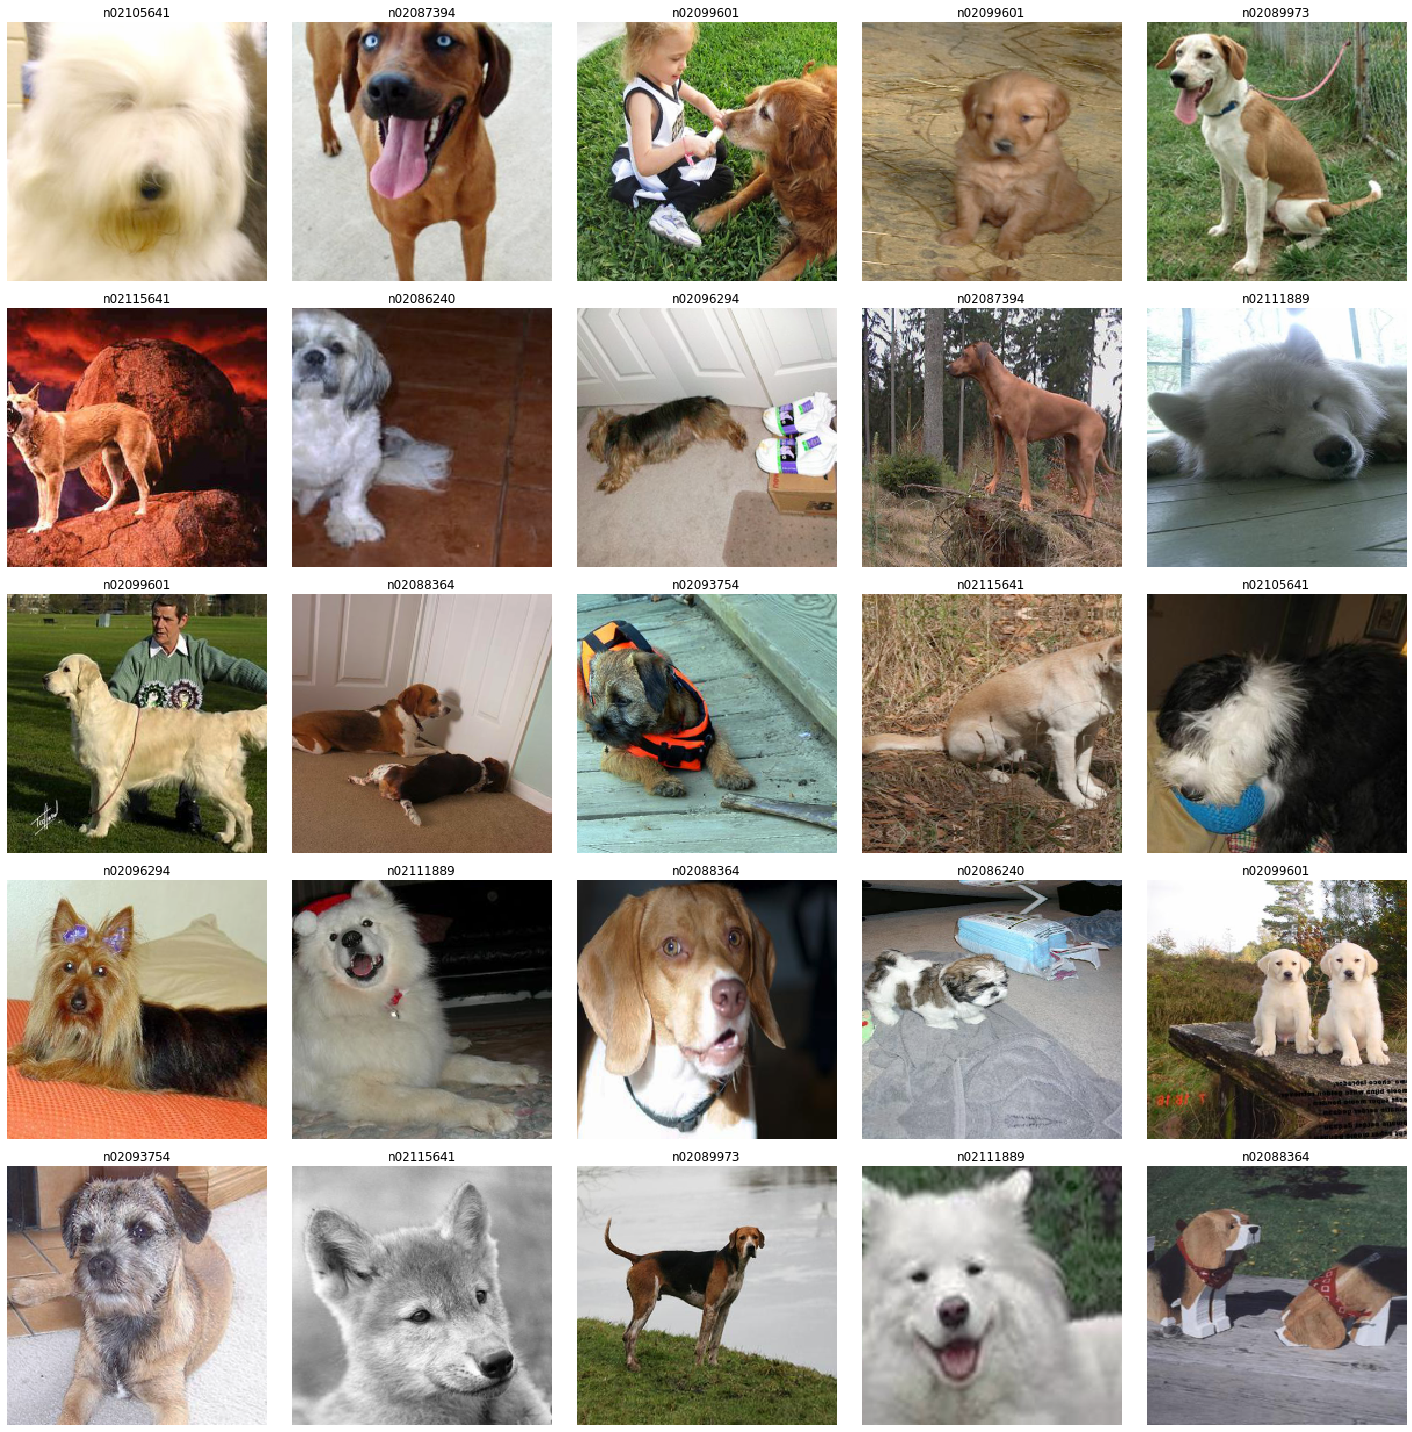

In [49]:
data = ImageDataBunch.from_folder(PATH, train='train', valid='val',
                                 ds_tfms=get_transforms(), size=224)

data.show_batch()

len(data.train_ds)

In [50]:
len(data.valid_ds)

500

In [3]:
TRAIN = PATH/'train'

In [150]:
TRAIN.ls()

[PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02089973'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02086240'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02105641'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02087394'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02099601'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02115641'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02093754'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02111889'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02096294'),
 PosixPath('/Users/akash/.fastai/data/imagewoof-320/train/n02088364')]

# Make CSV

In [81]:
def get_label_from_names(names:Path):
    labels = []
    if is_listy(names):
        for name in names: 
            labels.append(Path(name).parent.name)
        return labels
    else: 
        return Path(names).parent.name
    
names = get_files(TRAIN, recurse=True, extensions='.JPEG')
get_label_from_name(names[:10])

In [154]:
def make_df(names:list):
    names2 = names.copy()
    random.shuffle(names2)
    df = pd.DataFrame(data=[names, names2]).T
    labels1 = np.array(get_label_from_names(list(df.iloc[:,0])))
    labels2 = np.array(get_label_from_names(list(df.iloc[:,1])))
    labels = (labels1 == labels2).astype(np.int32)
    df['label'] = labels
    df.columns = ['image1', 'image2', 'label']
    return df

df = make_df(get_files(TRAIN, recurse=True, extensions='.JPEG'))
df.head()

image1  \
0  /Users/akash/.fastai/data/imagewoof-320/train/...   
1  /Users/akash/.fastai/data/imagewoof-320/train/...   
2  /Users/akash/.fastai/data/imagewoof-320/train/...   
3  /Users/akash/.fastai/data/imagewoof-320/train/...   
4  /Users/akash/.fastai/data/imagewoof-320/train/...   

                                              image2  label  
0  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
1  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
2  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
3  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
4  /Users/akash/.fastai/data/imagewoof-320/train/...      0

In [141]:
def make_csv_from_path(TRAIN=TRAIN, mult=5):
    TRAIN = Path(TRAIN)
    names60 = []
    dfs = []
    for d in TRAIN.ls():
        names = d.ls() * mult
        random.shuffle(names)
        names40 = names[:int(len(names)*0.4)]
        names60.extend(names[int(len(names)*0.4):])
        dfs.append(make_df(names40))
        
    df60 = make_df(names60)
    for df in dfs:
        df60 = df60.append(df)

    return df60

df = make_csv_from_path(TRAIN)
df.hist()

# FastAI Databunch

In [144]:
df.columns.get_loc('label')

2

In [148]:
df.iloc[:,:2].values.shape

(12454, 2)

In [151]:
df.head()

0  \
0  /Users/akash/.fastai/data/imagewoof-320/train/...   
1  /Users/akash/.fastai/data/imagewoof-320/train/...   
2  /Users/akash/.fastai/data/imagewoof-320/train/...   
3  /Users/akash/.fastai/data/imagewoof-320/train/...   
4  /Users/akash/.fastai/data/imagewoof-320/train/...   

                                                   1  label  
0  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
1  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
2  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
3  /Users/akash/.fastai/data/imagewoof-320/train/...      0  
4  /Users/akash/.fastai/data/imagewoof-320/train/...      0

In [161]:
data = ImageList.from_df(df, path='/', cols=['image1', 'image2'])

In [205]:
class DoubleImageList(ImageList):
    def open(self, fn):
        im1 = open_image(fn[0]).resize(320)
        im2 = open_image(fn[1]).resize(320)
        black_space = torch.zeros(3, 320, 20)
        return Image(torch.cat([im1.data, black_space, im2.data], dim = 2))

In [224]:
data = (DoubleImageList.from_df(df, path='/', cols=['image1', 'image2'])
        .split_by_rand_pct(0.2)
        .label_from_df(cols=['label'])
        .transform(get_transforms())
        .databunch(bs=2)
        .normalize(imagenet_stats))

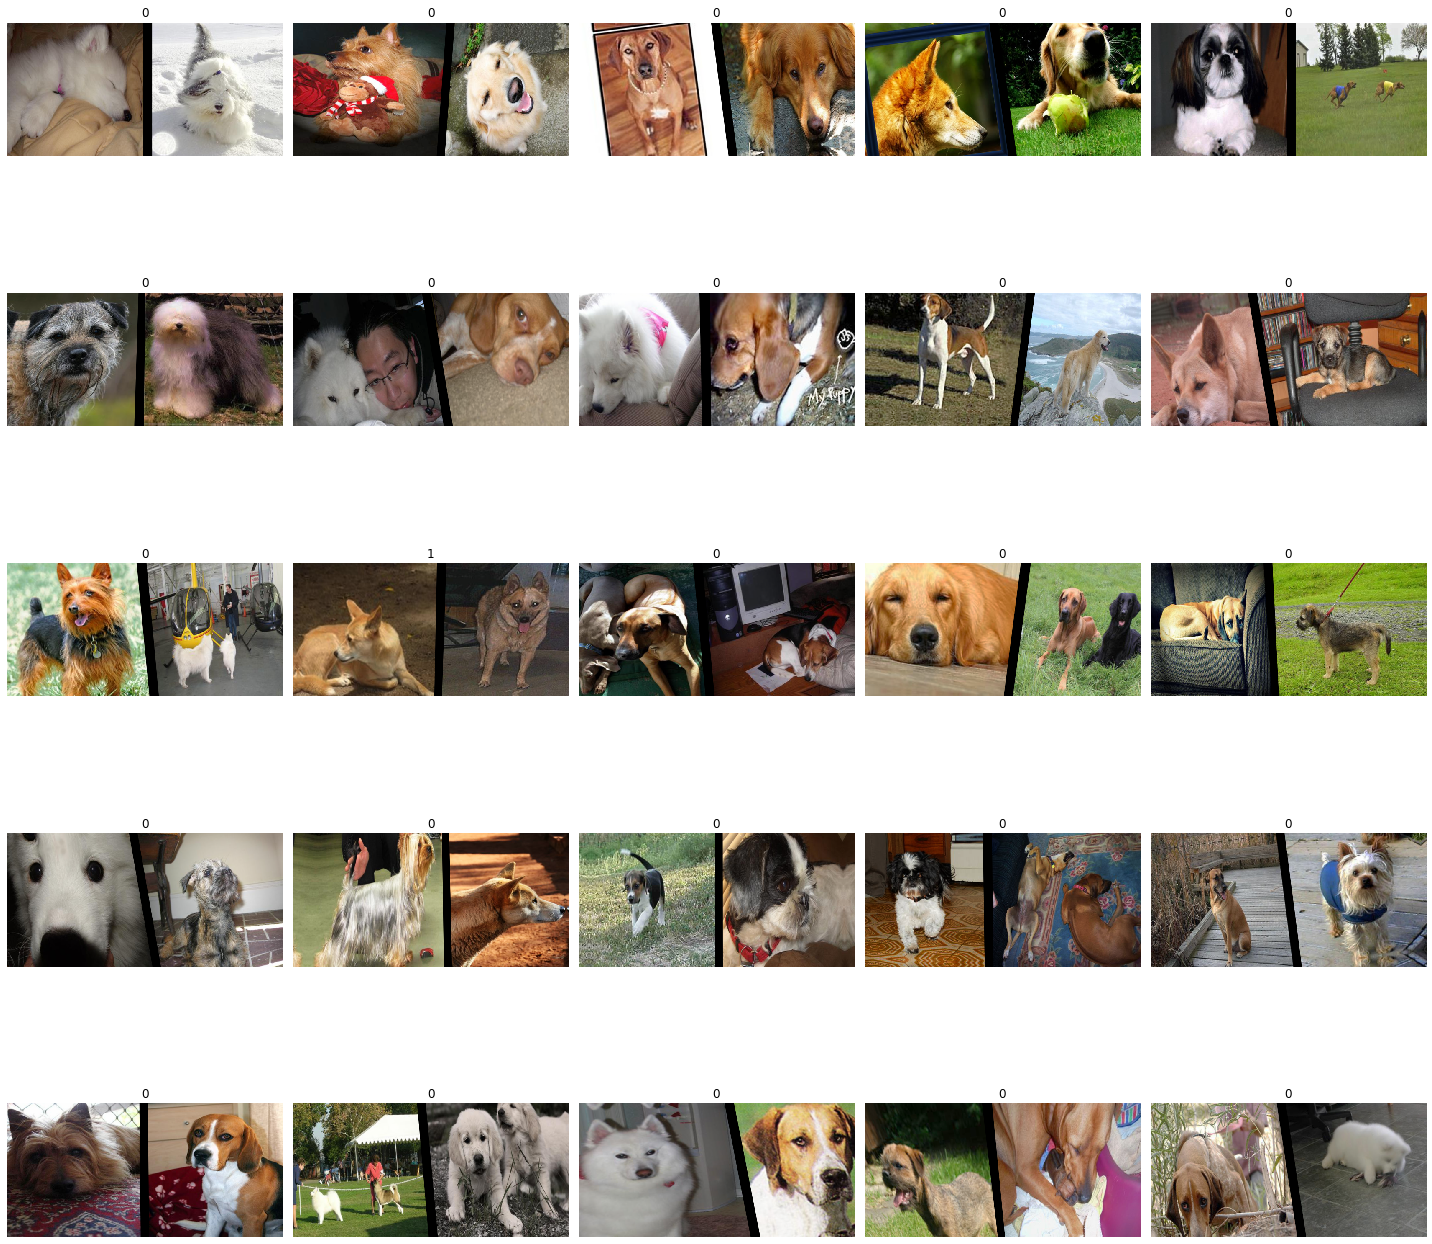

In [219]:
data.show_batch()

# Model

In [225]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy])

In [226]:
learn.fit_one_cycle(1)

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/akash/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/akash/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/akash/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/akash/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/Users/akash/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/akash/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/akash/anaconda3/lib/python3

KeyboardInterrupt: 